## House Price Prediction

In [1]:
# predict the price of a house

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Datasets/house_price.csv', header=0)
print('rows:', df.shape[0], '| columns:', df.shape[1])
df.head()

rows: 506 | columns: 19


,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [4]:
# created an in-depth report for exploratory data analysis
# profile = ProfileReport(df, title="Profile Report", )
# profile

###### Profile Report Observations
    1.constant values: bust_ter
    2.missing values: n_hos_beds
    3.outliers: n_hot_rooms, rainfall
    4.skewness: crime_rate

### Data Preparation
###### 1. outlier treatment

In [5]:
# for number of hotel rooms
upperlimit = round(np.percentile(df.n_hot_rooms,99.1),4)
print(upperlimit)

15.4


In [6]:
df[df.n_hot_rooms > upperlimit]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
423,13.4,7.05042,48.10,0.614,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [7]:
df.n_hot_rooms[df.n_hot_rooms > upperlimit*3] = upperlimit*3

In [8]:
# for rainfall
lowerlimit = np.percentile(df.rainfall,1)
print(lowerlimit)

20.0


In [9]:
df[df.rainfall < lowerlimit]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3,YES,0.044019


In [10]:
df.rainfall[df.rainfall < lowerlimit*0.3] = lowerlimit*0.3

###### 2. missing value imputation

In [11]:
df[df.n_hos_beds.isnull()]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
50,19.7,0.08873,35.64,0.439,5.963,45.7,7.08,6.55,7.00,6.63,23.2,13.45,YES,NaN,11.1576,River,21,YES,0.040389
112,18.8,0.12329,40.01,0.547,5.913,92.9,2.55,2.23,2.56,2.07,22.2,16.21,YES,NaN,15.1504,River,35,YES,0.057644
215,25.0,0.19802,40.59,0.489,6.182,42.4,4.15,3.81,3.96,3.87,21.4,9.47,YES,NaN,12.2000,Lake,30,YES,0.047925
260,33.8,0.54011,33.97,0.647,7.203,81.8,2.12,1.95,2.37,2.01,27.0,9.59,YES,NaN,11.2704,Lake,21,YES,0.068041
359,22.6,4.26131,48.10,0.770,6.112,81.3,2.78,2.38,2.56,2.31,19.8,12.67,NO,NaN,14.1808,Lake,26,YES,0.074239
403,8.3,24.80170,48.10,0.693,5.349,96.0,1.75,1.38,1.88,1.80,19.8,19.77,YES,NaN,15.0664,River,40,YES,0.067689
416,7.5,10.83420,48.10,0.679,6.782,90.8,1.90,1.54,2.04,1.80,19.8,25.79,YES,NaN,10.0600,River,35,YES,0.064619
496,19.7,0.28960,39.69,0.585,5.390,72.9,2.86,2.61,2.98,2.74,20.8,21.14,NO,NaN,12.1576,River,44,YES,0.061026


In [12]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

###### 3. feature transformation

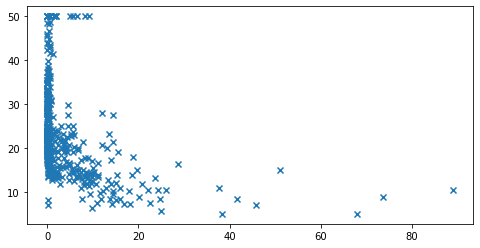

In [13]:
# crime_rate skewness
plt.figure(figsize=(8,4))
plt.scatter(x='crime_rate', y='price', data=df, marker='x')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [14]:
df.crime_rate = np.log10(df.crime_rate+1)
# +1 because crime_rate has values = 0

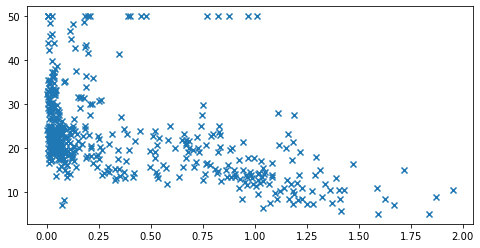

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(x='crime_rate', y='price', data=df, marker='x')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [16]:
df['average_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4) / 4

In [17]:
df.drop(columns=['dist1','dist2','dist3','dist4'], inplace=True)

In [18]:
df.drop(columns='bus_ter', inplace=True)

In [19]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,average_dist
0,24.0,0.002736,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,4.0875
1,21.6,0.011702,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,4.9675
2,34.7,0.011693,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.2000,None,38,0.045764,4.9675
3,33.4,0.013835,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,6.0650
4,36.2,0.028998,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,6.0625


###### 4. encoding

In [20]:
# one hot encoding for categorical features [airport and waterbody]
df = pd.get_dummies(df, drop_first=True)

In [21]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,average_dist,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.002736,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,1,0,0,1
1,21.6,0.011702,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,0,0,0,0
2,34.7,0.011693,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.2000,38,0.045764,4.9675,0,0,1,0
3,33.4,0.013835,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,1,0,0,0
4,36.2,0.028998,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,0,0,0,0


###### 5. correlation

In [22]:
corr = round(df.corr(), 3)
corr['price']

price                       1.000
crime_rate                 -0.467
resid_area                 -0.485
air_qual                   -0.429
room_num                    0.696
age                        -0.378
teachers                    0.506
poor_prop                  -0.741
n_hos_beds                  0.109
n_hot_rooms                 0.017
rainfall                   -0.047
parks                      -0.392
average_dist                0.249
airport_YES                 0.183
waterbody_Lake and River   -0.037
waterbody_None             -0.077
waterbody_River             0.072
Name: price, dtype: float64

In [23]:
# air_qual is highly positively correlated with 4 others
corr[corr > 0.7]

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,average_dist,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crime_rate,NaN,1.000,NaN,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resid_area,NaN,NaN,1.000,0.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708,NaN,NaN,NaN,NaN,NaN
air_qual,NaN,0.708,0.764,1.000,NaN,0.731,NaN,NaN,NaN,NaN,NaN,0.916,NaN,NaN,NaN,NaN,NaN
room_num,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,0.731,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teachers,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poor_prop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hos_beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hot_rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# average_dist is highly negatively correlated with 4 others
corr[corr < -0.7]

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,average_dist,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crime_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resid_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.708,NaN,NaN,NaN,NaN
air_qual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.769,NaN,NaN,NaN,NaN
room_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748,NaN,NaN,NaN,NaN
teachers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poor_prop,-0.741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hos_beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hot_rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.drop(columns=['air_qual', 'average_dist'], inplace=True)

In [26]:
# resid_area is highly correlated with parks
corr = round(df.corr(), 3)
corr[corr > 0.7]

,price,crime_rate,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crime_rate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resid_area,NaN,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.708,NaN,NaN,NaN,NaN
room_num,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teachers,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poor_prop,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hos_beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_hot_rooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rainfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


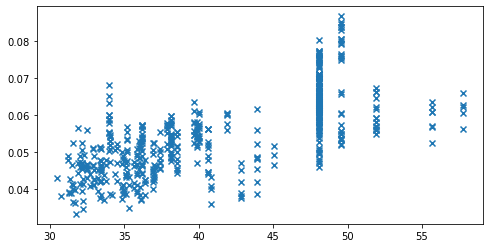

In [27]:
plt.figure(figsize=(8,4))
plt.scatter(x='resid_area', y='parks', data=df, marker='x')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [28]:
# checking for multi-collinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
X0 = sm.add_constant(df.drop(columns=['price']))
vif = {}
for i in range(1, len(X0.columns)):
    vif[X0.columns[i]] = round(variance_inflation_factor(X0.values, i), 3)

In [30]:
# no multi-collinearity
vif

{'crime_rate': 2.4,
 'resid_area': 2.83,
 'room_num': 1.857,
 'age': 2.381,
 'teachers': 1.376,
 'poor_prop': 2.939,
 'n_hos_beds': 1.031,
 'n_hot_rooms': 1.016,
 'rainfall': 1.029,
 'parks': 2.735,
 'airport_YES': 1.064,
 'waterbody_Lake and River': 1.525,
 'waterbody_None': 1.824,
 'waterbody_River': 1.871}

In [31]:
df.head()

,price,crime_rate,resid_area,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.002736,32.31,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,1,0,0,1
1,21.6,0.011702,37.07,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,0,0,0,0
2,34.7,0.011693,37.07,7.185,61.1,22.2,4.03,7.394,46.2000,38,0.045764,0,0,1,0
3,33.4,0.013835,32.18,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,1,0,0,0
4,36.2,0.028998,32.18,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,0,0,0


### Simple Linear Regression

In [32]:
# using statsmodel library

In [33]:
import statsmodels.api as sm

In [34]:
X = sm.add_constant(df['room_num'])
y = df['price']
simple_lr = sm.OLS(y,X).fit()
print(simple_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.31e-74
Time:                        18:42:46   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.0

In [35]:
# using sklearn library

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
X = df[['room_num']]
y = df['price']
simple_lr_ = LinearRegression().fit(X,y)
print('intercept:', round(simple_lr_.intercept_,3))
print('room_num coef:', round(simple_lr_.coef_[0], 3))

intercept: -34.659
room_num coef: 9.1


<Figure size 720x360 with 0 Axes>

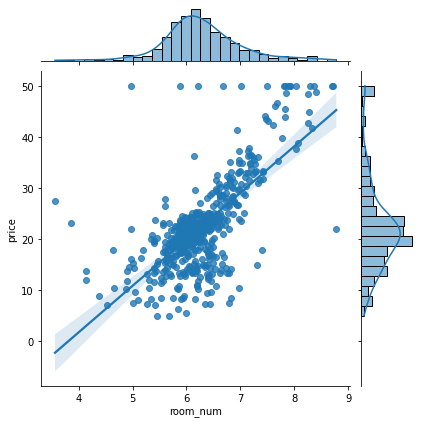

In [38]:
plt.figure(figsize=(10,5))
sns.jointplot(x='room_num', y='price', data=df, kind='reg')
plt.show()

### Multiple Linear Regression

In [39]:
# using statsmodel library

In [40]:
X = sm.add_constant(df.drop(columns=['price']))
y = df['price']
multiple_lr = sm.OLS(y,X).fit()
print(multiple_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     79.89
Date:                Mon, 06 May 2024   Prob (F-statistic):          1.00e-116
Time:                        18:42:48   Log-Likelihood:                -1539.1
No. Observations:                 506   AIC:                             3108.
Df Residuals:                     491   BIC:                             3172.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [41]:
# using sklearn library

In [42]:
X = df.drop(columns=['price'])
y = df['price']
multiple_lr_ = LinearRegression().fit(X,y)
print('intercept:', round(multiple_lr_.intercept_,3))
print('feature coef:', multiple_lr_.coef_)

intercept: -22.395
feature coef: [-3.71937080e-01  1.21485355e-02  4.25163594e+00  2.00855462e-02
  9.31428391e-01 -5.96219632e-01  4.30676901e-01  1.10776419e-01
  7.27504223e-03 -2.71202818e+01  1.24377014e+00 -8.75785712e-01
 -3.39233923e-01 -4.39851736e-01]


###### 6. train-test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, sep='\n')

(404, 14)
(102, 14)


###### 7. standardisation

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train[0]

array([-0.48535278, -0.70492455,  0.93567804,  0.69366877,  0.48463784,
       -0.41100022,  0.58265636, -0.5939835 , -1.31368908, -0.08763764,
       -1.10997486, -0.40529635, -0.66547513,  1.3293319 ])

### Linear Regression

In [48]:
lr = LinearRegression().fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [49]:
from sklearn.metrics import r2_score

In [50]:
train_score = round(r2_score(y_train, y_train_pred)*100, 2)
test_score = round(r2_score(y_test, y_test_pred)*100, 2)

In [51]:
r2scores = pd.DataFrame(columns=['model', 'train_r2', 'test_r2'])
scores = ['Linear Regression', train_score, test_score]
series = pd.Series(scores, index=r2scores.columns)
r2scores = r2scores.append(series, ignore_index=True)

### Regularisation

###### 1. Ridge regularisation

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge = Ridge().fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_score = round(r2_score(y_train, y_train_pred)*100, 2)
test_score = round(r2_score(y_test, y_test_pred)*100, 2)
print('train r2 score:', train_score)
print('test r2 score:', test_score)

train r2 score: 73.42
test r2 score: 50.11


In [54]:
from sklearn.model_selection import validation_curve

In [55]:
estimator = Ridge()
param_name = 'alpha'
param_range = np.logspace(-3, 2, 15)
train_scores, val_scores = validation_curve(estimator=estimator, 
                                            X=X_train, 
                                            y=y_train, 
                                            param_name=param_name, 
                                            param_range=param_range, 
                                            cv=5, scoring='r2')

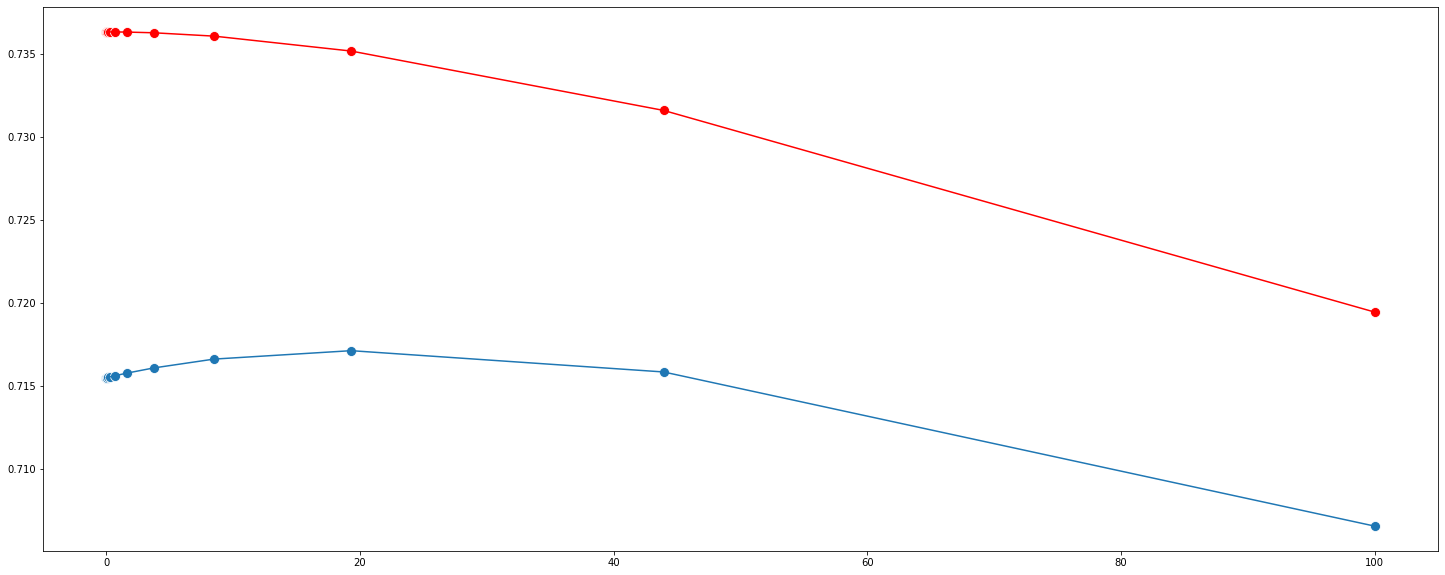

In [56]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=param_range, y=val_scores.mean(axis=1), s=100)
sns.lineplot(x=param_range, y=val_scores.mean(axis=1))
sns.scatterplot(x=param_range, y=train_scores.mean(axis=1), s=100, color='red')
sns.lineplot(x=param_range, y=train_scores.mean(axis=1), color='red')
plt.show()

In [57]:
best_alpha = param_range[np.argmax(val_scores.mean(axis=1))]
print(best_alpha)

19.306977288832496


In [58]:
ridge = Ridge(alpha=best_alpha).fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

train_score = round(r2_score(y_train, y_train_pred)*100, 2)
test_score = round(r2_score(y_test, y_test_pred)*100, 2)

scores = ['Ridge Regression', train_score, test_score]
series = pd.Series(scores, index=r2scores.columns)
r2scores = r2scores.append(series, ignore_index=True)

###### 2. Lasso regularisation

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso = Lasso().fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train_score = round(r2_score(y_train, y_train_pred)*100, 2)
test_score = round(r2_score(y_test, y_test_pred)*100, 2)
print('train r2 score:', train_score)
print('test r2 score:', test_score)

train r2 score: 70.51
test r2 score: 51.22


In [61]:
estimator = Lasso()
param_name = 'alpha'
param_range = np.logspace(-3, 0, 15)
train_scores, val_scores = validation_curve(estimator=estimator, 
                                            X=X_train, 
                                            y=y_train, 
                                            param_name=param_name, 
                                            param_range=param_range, 
                                            cv=5, 
                                            scoring='r2')

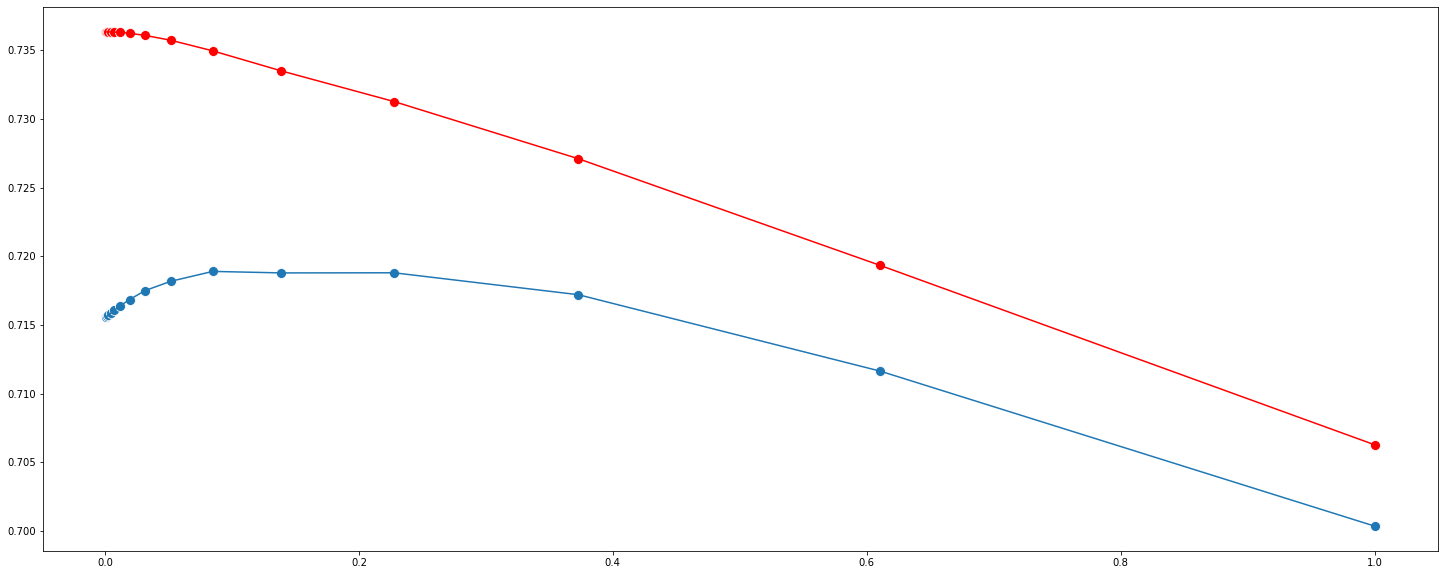

In [62]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=param_range, y=val_scores.mean(axis=1), s=100)
sns.lineplot(x=param_range, y=val_scores.mean(axis=1))
sns.scatterplot(x=param_range, y=train_scores.mean(axis=1), s=100, color='red')
sns.lineplot(x=param_range, y=train_scores.mean(axis=1), color='red')
plt.show()

In [63]:
best_alpha = param_range[np.argmax(val_scores.mean(axis=1))]
print(best_alpha)

0.08483428982440717


In [64]:
lasso = Lasso(alpha=best_alpha).fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

train_score = round(r2_score(y_train, y_train_pred)*100, 2)
test_score = round(r2_score(y_test, y_test_pred)*100, 2)

scores = ['Lasso Regression', train_score, test_score]
series = pd.Series(scores, index=r2scores.columns)
r2scores = r2scores.append(series, ignore_index=True)

### K-Nearest Neighbours

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
estimator = KNeighborsRegressor()
param_name = 'n_neighbors'
param_range = range(2,21,2)
train_scores, val_scores = validation_curve(estimator=estimator, 
                                            X=X_train, 
                                            y=y_train, 
                                            param_name=param_name, 
                                            param_range=param_range, 
                                            cv=5, 
                                            scoring='neg_mean_squared_error')

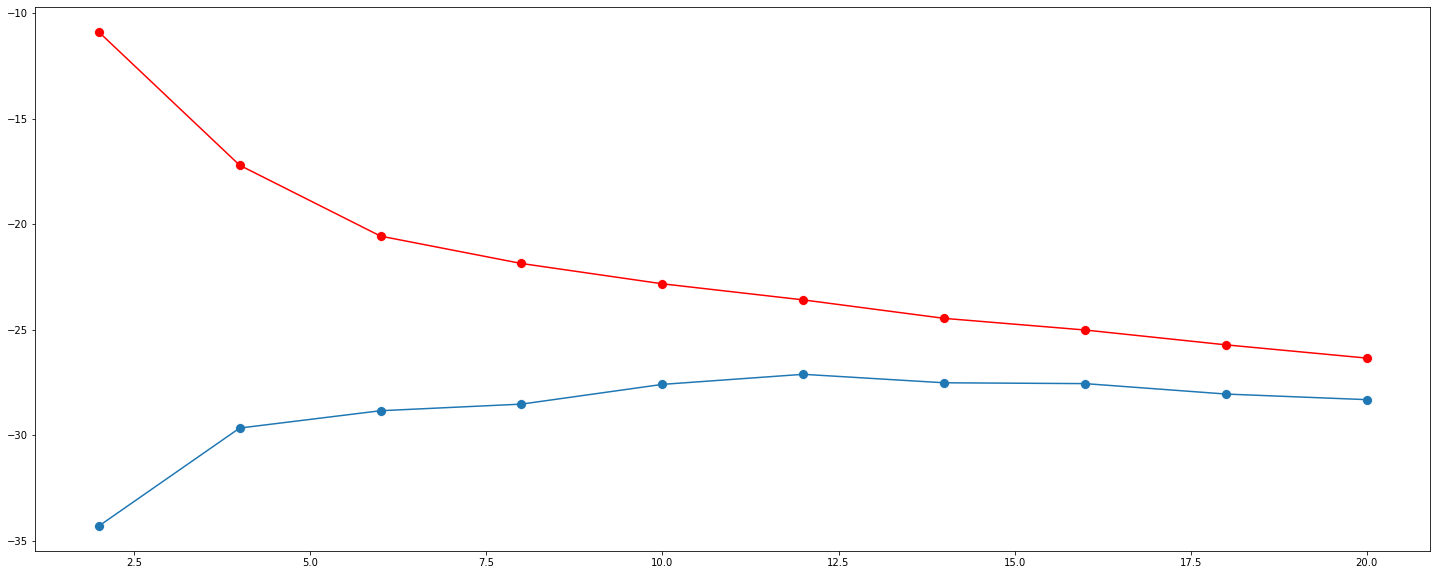

In [67]:
plt.figure(figsize=(25,10))
sns.scatterplot(x=param_range, y=val_scores.mean(axis=1), s=100)
sns.lineplot(x=param_range, y=val_scores.mean(axis=1))
sns.scatterplot(x=param_range, y=train_scores.mean(axis=1), s=100, color='red')
sns.lineplot(x=param_range, y=train_scores.mean(axis=1), color='red')
plt.show()

In [68]:
best_n = param_range[np.argmax(val_scores.mean(axis=1))]
print(best_n)

12


In [69]:
knn = KNeighborsRegressor(n_neighbors=best_n).fit(X_train, y_train)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mse = pd.DataFrame(columns=['model', 'train_mse', 'test_mse'])
models = {'Linear Regression':lr, 
          'Ridge Regression':ridge, 
          'Lasso Regression':lasso, 
          'K-Nearest Neighbours':knn, }
for key, value in models.items():
    train_mse = round(mean_squared_error(y_train, value.predict(X_train)), 3)
    test_mse = round(mean_squared_error(y_test, value.predict(X_test)), 3)
    
    scores = [key, train_mse, test_mse]
    series = pd.Series(scores, index=mse.columns)
    mse = mse.append(series, ignore_index=True)

In [72]:
mse

,model,train_mse,test_mse
0,Linear Regression,22.604,40.132
1,Ridge Regression,22.668,40.502
2,Lasso Regression,22.700,40.208
3,K-Nearest Neighbours,22.631,39.957


In [73]:
r2scores

,model,train_r2,test_r2
0,Linear Regression,73.42,50.13
1,Ridge Regression,73.35,49.68
2,Lasso Regression,73.31,50.04
